In [83]:
import pandas as pd
import matplotlib as mpl

ModuleNotFoundError: No module named 'matplotlib'

In [84]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 3.2 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 4.7 MB/s eta 0:00:005.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 6.4 MB/s eta 0:00:006.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 6.0 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 4.7 MB/s eta 0:00:00


In [16]:
df = pd.read_json('./titanic.json')

In [17]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1st,lived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1st,lived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1st,died,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,died,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1st,died,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [18]:
df['survived'] = df['survived'].replace(1, 'lived')

In [19]:
df['survived'] = df['survived'].replace(0, 'died')

In [20]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1st,lived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1st,lived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1st,died,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,died,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1st,died,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [21]:
df['pclass'] = df['pclass'].replace(1, '1st')
df['pclass'] = df['pclass'].replace(2, '2nd')
df['pclass'] = df['pclass'].replace(3, '3rd')

In [22]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1st,lived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1st,lived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1st,died,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,died,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1st,died,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [27]:
df = df.rename(columns={'sibsp': 'sibling/spouse', 'parch': 'parent/child'})

In [59]:
df.to_json('titanic.json', orient='records')

In [29]:
!pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 3.3 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.6 MB/s eta 0:00:00


In [34]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="vrdatavizzer")
location = geolocator.geocode("Montreal, PQ")

In [35]:
print(location)

Montreal, Avenida Clara Lanzi Bueno, Jardim Carmen Lydia II, Jardim Santo André, Mogi Guaçu, Região Imediata de Mogi Guaçu, Região Geográfica Intermediária de Campinas, São Paulo, Região Sudeste, 13847-193, Brasil


In [53]:
Q = 'Queenstown, ireland'
S = 'Southampton, England'
C = 'Cherbourg, France'

locations = {}

for c in [Q, S, C]:
    locations[c[:1]] = geolocator.geocode(c)
    print(location)

Cherbourg-en-Cotentin, Cherbourg, Manche, Normandie, France métropolitaine, France
Cherbourg-en-Cotentin, Cherbourg, Manche, Normandie, France métropolitaine, France
Cherbourg-en-Cotentin, Cherbourg, Manche, Normandie, France métropolitaine, France


In [38]:
locations['Cherbourg, France'].point

Point(49.6425343, -1.6249565, 0.0)

In [39]:
locations['Cherbourg, France'].raw

{'place_id': 246745054,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 5812062,
 'lat': '49.6425343',
 'lon': '-1.6249565',
 'class': 'boundary',
 'type': 'administrative',
 'place_rank': 16,
 'importance': 0.46298697513788706,
 'addresstype': 'town',
 'name': 'Cherbourg-en-Cotentin',
 'display_name': 'Cherbourg-en-Cotentin, Cherbourg, Manche, Normandie, France métropolitaine, France',
 'boundingbox': ['49.5806613', '49.6749347', '-1.7376547', '-1.5334876']}

In [55]:
def geostamp(row):
    try: 
        l = locations[row['embarked']]
        return f'{l.latitude},{l.longitude}'
    except Exception as e:
        print(e)
        return pd.NaT

In [54]:
locations

{'Q': Location(Cobh, County Cork, Munster, Éire / Ireland, (51.8500947, -8.294279, 0.0)),
 'S': Location(Southampton, England, United Kingdom, (50.9025349, -1.404189, 0.0)),
 'C': Location(Cherbourg-en-Cotentin, Cherbourg, Manche, Normandie, France métropolitaine, France, (49.6425343, -1.6249565, 0.0))}

In [56]:
df['coords_embarked'] = df.apply(geostamp, axis=1)

None
None


In [58]:
df.head(100)

,pclass,survived,name,sex,age,sibling/spouse,parent/child,ticket,fare,cabin,embarked,boat,body,home.dest,coords_embarked
0,1st,lived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","50.9025349,-1.404189"
1,1st,lived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","50.9025349,-1.404189"
2,1st,died,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON","50.9025349,-1.404189"
3,1st,died,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON","50.9025349,-1.404189"
4,1st,died,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON","50.9025349,-1.404189"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1st,lived,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0000,1,1,33638,81.8583,A34,S,5,NaN,"San Francisco, CA","50.9025349,-1.404189"
96,1st,died,"Douglas, Mr. Walter Donald",male,50.0000,1,0,PC 17761,106.4250,C86,C,None,62.0,"Deephaven, MN / Cedar Rapids, IA","49.6425343,-1.6249565"
97,1st,lived,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0000,1,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ","49.6425343,-1.6249565"
98,1st,lived,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0000,1,0,PC 17761,106.4250,C86,C,2,NaN,"Deephaven, MN / Cedar Rapids, IA","49.6425343,-1.6249565"


In [67]:
df[(df.survived == 'lived') & (df.sex == 'female') & (df.pclass == '1st')]

,pclass,survived,name,sex,age,sibling/spouse,parent/child,ticket,fare,cabin,embarked,boat,body,home.dest,coords_embarked
0,1st,lived,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","50.9025349,-1.404189"
6,1st,lived,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY","50.9025349,-1.404189"
8,1st,lived,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY","50.9025349,-1.404189"
11,1st,lived,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY","49.6425343,-1.6249565"
12,1st,lived,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France","49.6425343,-1.6249565"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,1st,lived,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,None,S,8,NaN,"Youngstown, OH","50.9025349,-1.404189"
314,1st,lived,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1,1,113503,211.5000,C80,C,4,NaN,"Elkins Park, PA","49.6425343,-1.6249565"
315,1st,lived,"Willard, Miss. Constance",female,21.0,0,0,113795,26.5500,None,S,8 10,NaN,"Duluth, MN","50.9025349,-1.404189"
319,1st,lived,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,3,NaN,None,"49.6425343,-1.6249565"


In [68]:
uke = pd.read_csv('./ge_2019_constituencies.csv')

In [69]:
uke.head()

,const_id,const_name,elected_mp_party,elected_mp_party_name,elected_mp_name,elected_mp_votes,majority,valid,invalid,electorate,turnout_pct,ge17_party,ge17_majority,ge17_turnout
0,E14000530,Aldershot,Con,Conservative and Unionist Party,Leo Docherty,27980,16698,47932,NaN,72617.0,66.0,Con,11473,64.4
1,E14000531,Aldridge-Brownhills,Con,Conservative and Unionist Party,Wendy Morton,27850,19836,39342,NaN,60138.0,65.4,Con,14307,66.8
2,E14000532,Altrincham and Sale West,Con,Conservative and Unionist Party,Graham Brady,26311,6139,54763,NaN,73146.0,74.9,Con,6426,72.3
3,E14000533,Amber Valley,Con,Conservative and Unionist Party,Nigel Mills,29096,16886,45567,NaN,69976.0,65.1,Con,8300,67.5
4,E14000534,Arundel and South Downs,Con,Conservative and Unionist Party,Andrew Griffith,35566,22521,61408,NaN,NaN,NaN,Con,23883,76.0


In [70]:
uke.to_json('ukelections2019', orient='records')

In [74]:
uke['elected_mp_party'].unique()

array(['Con', 'Lab', 'LD', 'Green', 'Spk', 'DUP', 'SF', 'SDLP',
       'Alliance', 'SNP', 'PC'], dtype=object)

In [75]:
uke.stats()

AttributeError: 'DataFrame' object has no attribute 'stats'

In [76]:
uke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const_id               650 non-null    object 
 1   const_name             650 non-null    object 
 2   elected_mp_party       650 non-null    object 
 3   elected_mp_party_name  650 non-null    object 
 4   elected_mp_name        650 non-null    object 
 5   elected_mp_votes       650 non-null    int64  
 6   majority               650 non-null    int64  
 7   valid                  650 non-null    int64  
 8   invalid                0 non-null      float64
 9   electorate             508 non-null    float64
 10  turnout_pct            508 non-null    float64
 11  ge17_party             650 non-null    object 
 12  ge17_majority          650 non-null    int64  
 13  ge17_turnout           650 non-null    float64
dtypes: float64(4), int64(4), object(6)
memory usage: 71.2+ KB


In [77]:
uke.count()

const_id                 650
const_name               650
elected_mp_party         650
elected_mp_party_name    650
elected_mp_name          650
elected_mp_votes         650
majority                 650
valid                    650
invalid                    0
electorate               508
turnout_pct              508
ge17_party               650
ge17_majority            650
ge17_turnout             650
dtype: int64

<Axes: xlabel='elected_mp_party'>

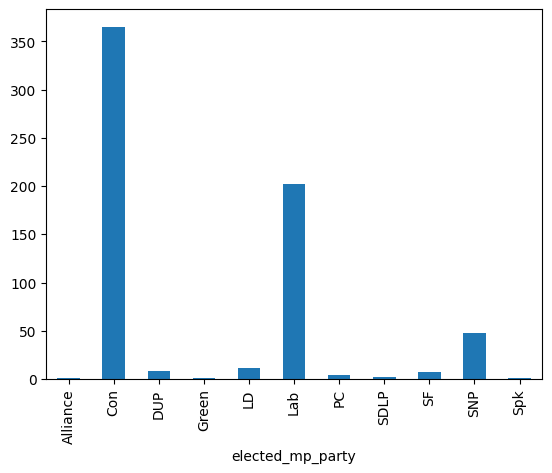

In [88]:
uke.groupby('elected_mp_party').size().plot(kind='bar')